# Ml clf algos


### Use case: Classifying Images


In [29]:
import pandas as pd
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

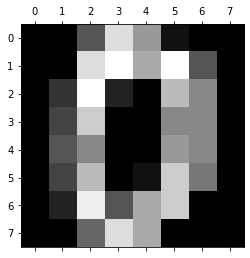

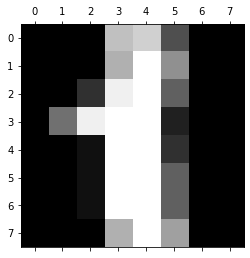

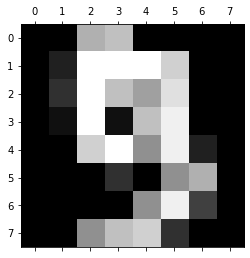

In [31]:
# let's look at a few of the images
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.matshow(digits.images[9])
plt.show()

# Workflow

- X & y
- train test split
- train & eval different models
    - Choose best model(s)
- Hyperparameter tuning for best model(s)
    - Proceed with best model
- Predictions on test data, final test against benchmark

### Train test split

In [32]:
X = digits.data
y = digits.target

In [33]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Train and evaluate diffrent algos

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier(),SVC(),
              KNeighborsClassifier(), GaussianNB()]
scaler = StandardScaler()

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    # always pass empty dct to param_grid if you are only using this method for K-folds Cv
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    print(f'Train score for {classifier}:{grid.best_score_}')

Train score for LogisticRegression():0.9576731378218367
Train score for DecisionTreeClassifier():0.8485281564091973
Train score for RandomForestClassifier():0.9725375189315709
Train score for SVC():0.9725292578824177
Train score for KNeighborsClassifier():0.9688228004956629
Train score for GaussianNB():0.7736252237367479


## LogReg

In [38]:
param_grid_logreg = {
    'logisticregression__C':[0.1, 1, 10, 100, 1000]
}

classifier = LogisticRegression(max_iter=1000)
pipe = make_pipeline(scaler, classifier)

grid_logreg = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid_logreg,
                cv=5,
                scoring= "accuracy")

grid_logreg.fit(X_train, y_train)

print("Best score: ", grid_logreg.best_score_)
print("Best params: ", grid_logreg.best_params_)

Best score:  0.9576731378218367
Best params:  {'logisticregression__C': 1}


## Random Forest


In [39]:
param_grid_rf = {
    'randomforestclassifier__min_samples_leaf':[1, 2, 4],
    'randomforestclassifier__max_depth':[10, 50, None],
    'randomforestclassifier__n_estimators':[50, 100, 200, 500],
}

classifier = RandomForestClassifier()
pipe = make_pipeline(scaler, classifier)

grid_rf = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid_rf,
                cv=5,
                scoring= "accuracy")

grid_rf.fit(X_train, y_train)

print("Best score: ", grid_rf.best_score_)
print("Best params: ", grid_rf.best_params_)

Best score:  0.9725347652485199
Best params:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 200}


In [40]:
param_grid_rf = {
    'randomforestclassifier__min_samples_leaf':[1, 2, 4],
    'randomforestclassifier__max_depth':[10, 50, None],
    'randomforestclassifier__n_estimators':[50, 100, 200, 500],
}

classifier = RandomForestClassifier()
pipe = make_pipeline(classifier)

grid_rf = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid_rf,
                cv=5,
                scoring= "accuracy")

grid_rf.fit(X_train, y_train)

print("Best score: ", grid_rf.best_score_)
print("Best params: ", grid_rf.best_params_)

Best score:  0.9725347652485199
Best params:  {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}


# SVC

In [42]:
param_grid_svc = {
    'svc__C':[0.1,1,10,100,1000],
    'svc__gamma':[1, 0.1,0.001,0.0001],
}
classifier = SVC()
pipe = make_pipeline(scaler, classifier)
grid_svc = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid_svc,
                cv=5,
                scoring= "accuracy")
grid_svc.fit(X_train, y_train)
print("Best score: ", grid_svc.best_score_)
print("Best params: ", grid_svc.best_params_)

Best score:  0.9732755059892606
Best params:  {'svc__C': 10, 'svc__gamma': 0.001}


## KNN

In [43]:
param_grid_knc = {
    'kneighborsclassifier__n_neighbors':[3,5,11,19],
    'kneighborsclassifier__metric':["euclidean" , "manhattan"]
    
}

classifier = KNeighborsClassifier()
pipe = make_pipeline(scaler, classifier)

grid_knc = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid_knc,
                cv=5,
                scoring= "accuracy")

grid_knc.fit(X_train, y_train)

print("Best score: ", grid_knc.best_score_)
print("Best params: ", grid_knc.best_params_)

Best score:  0.9740190004130526
Best params:  {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3}


## Final Evaluation on test data

In [44]:
trained_model = {
    'log reg' : grid_logreg,
    'random forest': grid_rf,
    'svc' : grid_svc,
    'kneighbors': grid_knc
}


for name, model in trained_model.items():
    score = model.score(X_test, y_test)
    params = model.best_params_
    
    print(f"score for {name}: {score}")
    print(f"With parameters: {params}")
    print("")

score for log reg: 0.9711111111111111
With parameters: {'logisticregression__C': 1}

score for random forest: 0.98
With parameters: {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}

score for svc: 0.9844444444444445
With parameters: {'svc__C': 10, 'svc__gamma': 0.001}

score for kneighbors: 0.9755555555555555
With parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3}

